### <i>  Predictive Modeling of Water Quality and Sewage Systems: A Comparative Analysis and Economic Impact Assessment Using Machine Learning </i>
### <i> Import some Library Files </i>

In [38]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


### <i> Load The Dataset </i>

In [39]:
df = pd.read_csv("dataset.csv")
df

,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good
...,...,...,...,...,...,...
40075,32.173429,121.459362,2017-03-11,6.765070,0.692772,Moderate
40076,-44.355125,-35.739953,2015-05-16,6.955335,2.917616,Moderate
40077,-82.957382,177.979361,2020-08-30,8.714242,1.683240,Poor
40078,-17.483532,25.092800,2018-12-13,0.739058,0.225967,Good


### <i> Dataset OVerview </i>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40080 entries, 0 to 40079
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geographical Location (Latitude)   40080 non-null  float64
 1   Geographical Location (Longitude)  40080 non-null  float64
 2   Sampling Date                      40080 non-null  object 
 3   Nitrogen (mg/L)                    40080 non-null  float64
 4   Phosphorus (mg/L)                  40080 non-null  float64
 5   State of Sewage System             40080 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [41]:
df.describe()

,Geographical Location (Latitude),Geographical Location (Longitude),Nitrogen (mg/L),Phosphorus (mg/L)
count,40080.000000,40080.000000,40080.000000,40080.000000
mean,0.171349,-0.626047,5.020690,2.499863
std,51.825410,104.848886,2.914000,1.439897
min,-89.954308,-179.971464,0.003381,0.000068
25%,-44.470584,-92.737203,2.469945,1.237920
50%,0.576327,-1.678289,5.013687,2.516371
75%,45.520516,91.033062,7.563102,3.757351
max,89.993523,179.985338,9.999745,4.999669


### <i> Data Preprocessing </i>

In [42]:
# 1. Handle Datetime - Convert 'Sampling Date' to datetime format
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], errors='coerce')

# 2. Handle Categorical Variables - Encode 'State of Sewage System' with Label Encoding
label_encoder = LabelEncoder()
df['State of Sewage System'] = label_encoder.fit_transform(df['State of Sewage System'])

# 3. Handle Missing Values - Check for any missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Fill missing values if any (assuming mean imputation for continuous and mode for categorical columns)
df['Nitrogen (mg/L)'].fillna(df['Nitrogen (mg/L)'].mean(), inplace=True)
df['Phosphorus (mg/L)'].fillna(df['Phosphorus (mg/L)'].mean(), inplace=True)
df['Sampling Date'].fillna(df['Sampling Date'].mode()[0], inplace=True)

# 4. Feature Engineering - Create new features (e.g., year, month, day) from 'Sampling Date'
df['Year'] = df['Sampling Date'].dt.year
df['Month'] = df['Sampling Date'].dt.month
df['Day'] = df['Sampling Date'].dt.day

# Drop original 'Sampling Date' if not needed after feature engineering
df.drop(columns=['Sampling Date'], inplace=True)

# 5. Scaling Numerical Features
scaler = StandardScaler()
numerical_cols = ['Geographical Location (Latitude)', 'Geographical Location (Longitude)', 'Nitrogen (mg/L)', 'Phosphorus (mg/L)']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 6. Split Data (optional)
X = df.drop(columns=['State of Sewage System'])  # Features
y = df['State of Sewage System']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Missing Values Count:
Geographical Location (Latitude)     0
Geographical Location (Longitude)    0
Sampling Date                        0
Nitrogen (mg/L)                      0
Phosphorus (mg/L)                    0
State of Sewage System               0
dtype: int64


### <i> Data Visulization And Analysis </i>

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


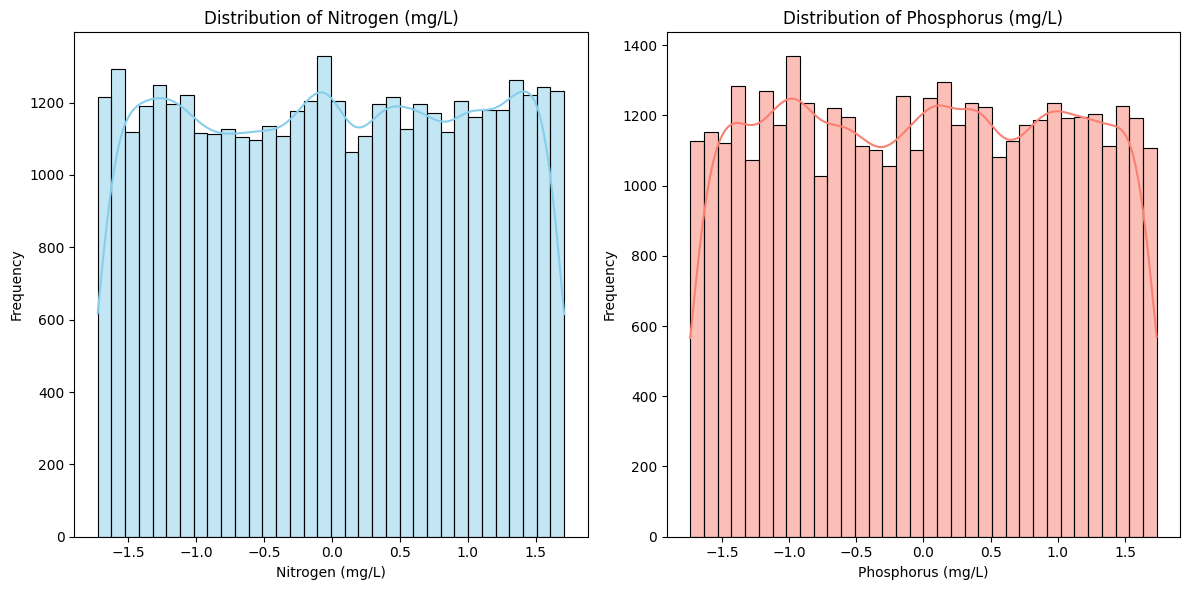

In [44]:
# 1. Distribution of Nitrogen and Phosphorus levels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Nitrogen (mg/L)'], kde=True, color='skyblue')
plt.title('Distribution of Nitrogen (mg/L)')
plt.xlabel('Nitrogen (mg/L)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Phosphorus (mg/L)'], kde=True, color='salmon')
plt.title('Distribution of Phosphorus (mg/L)')
plt.xlabel('Phosphorus (mg/L)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

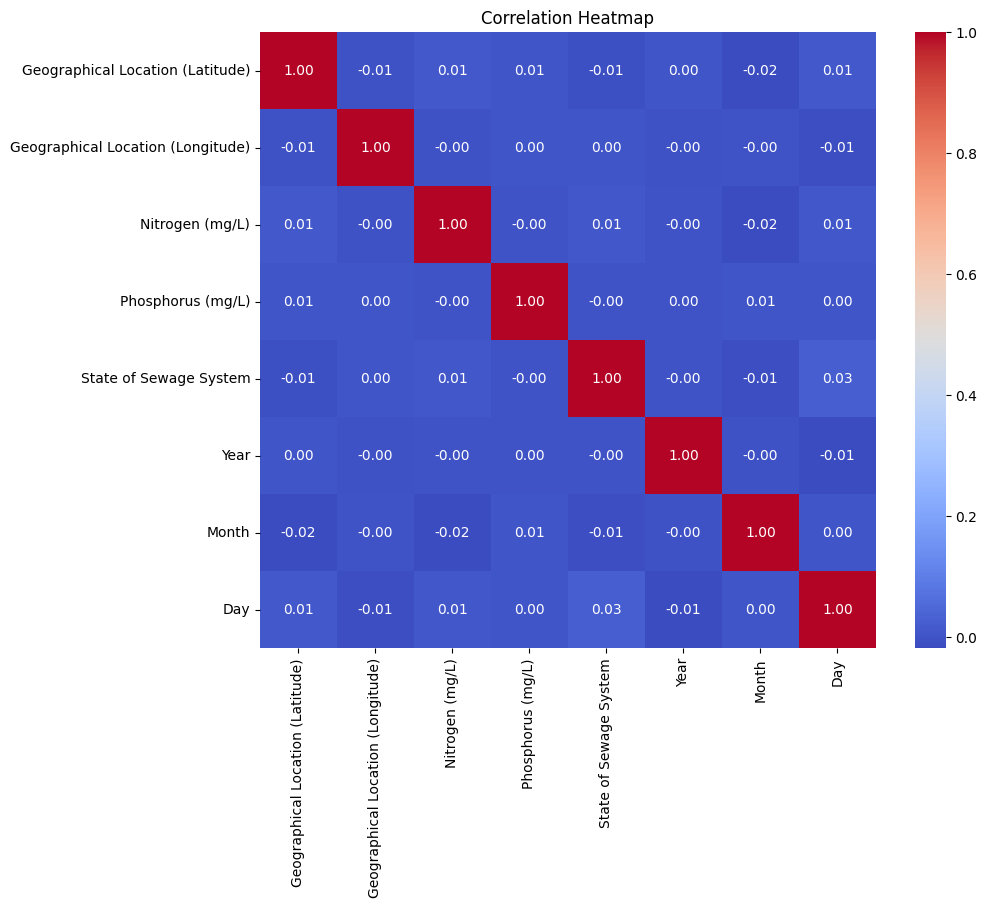

In [45]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

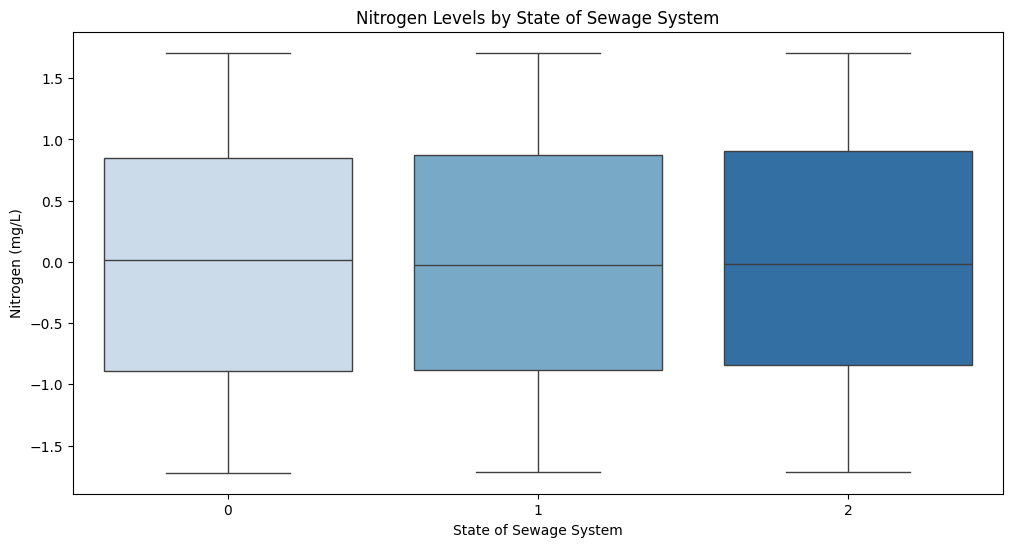

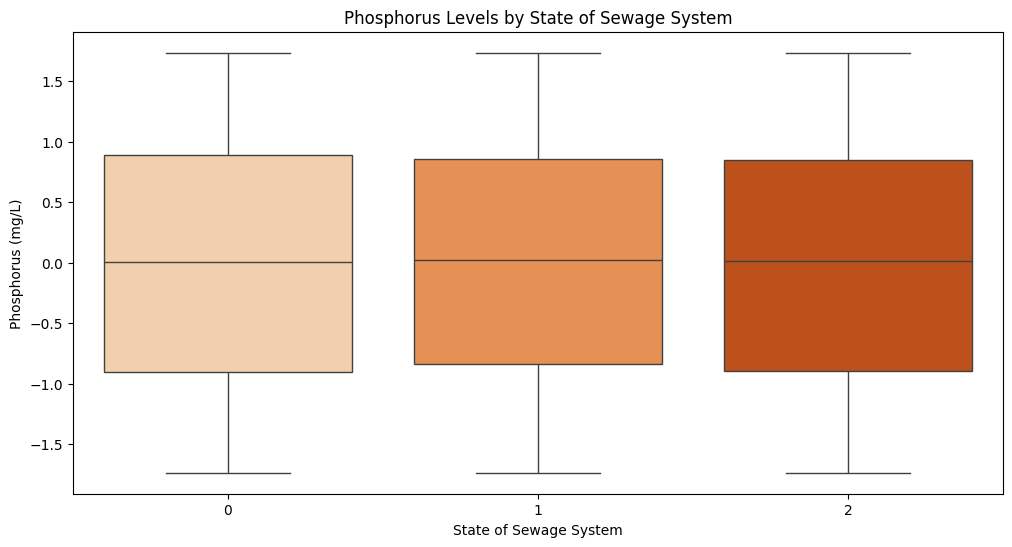

In [46]:
# 3. Nitrogen and Phosphorus levels by State of Sewage System
plt.figure(figsize=(12, 6))
sns.boxplot(x='State of Sewage System', y='Nitrogen (mg/L)', data=df, palette='Blues')
plt.title('Nitrogen Levels by State of Sewage System')
plt.xlabel('State of Sewage System')
plt.ylabel('Nitrogen (mg/L)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='State of Sewage System', y='Phosphorus (mg/L)', data=df, palette='Oranges')
plt.title('Phosphorus Levels by State of Sewage System')
plt.xlabel('State of Sewage System')
plt.ylabel('Phosphorus (mg/L)')
plt.show()


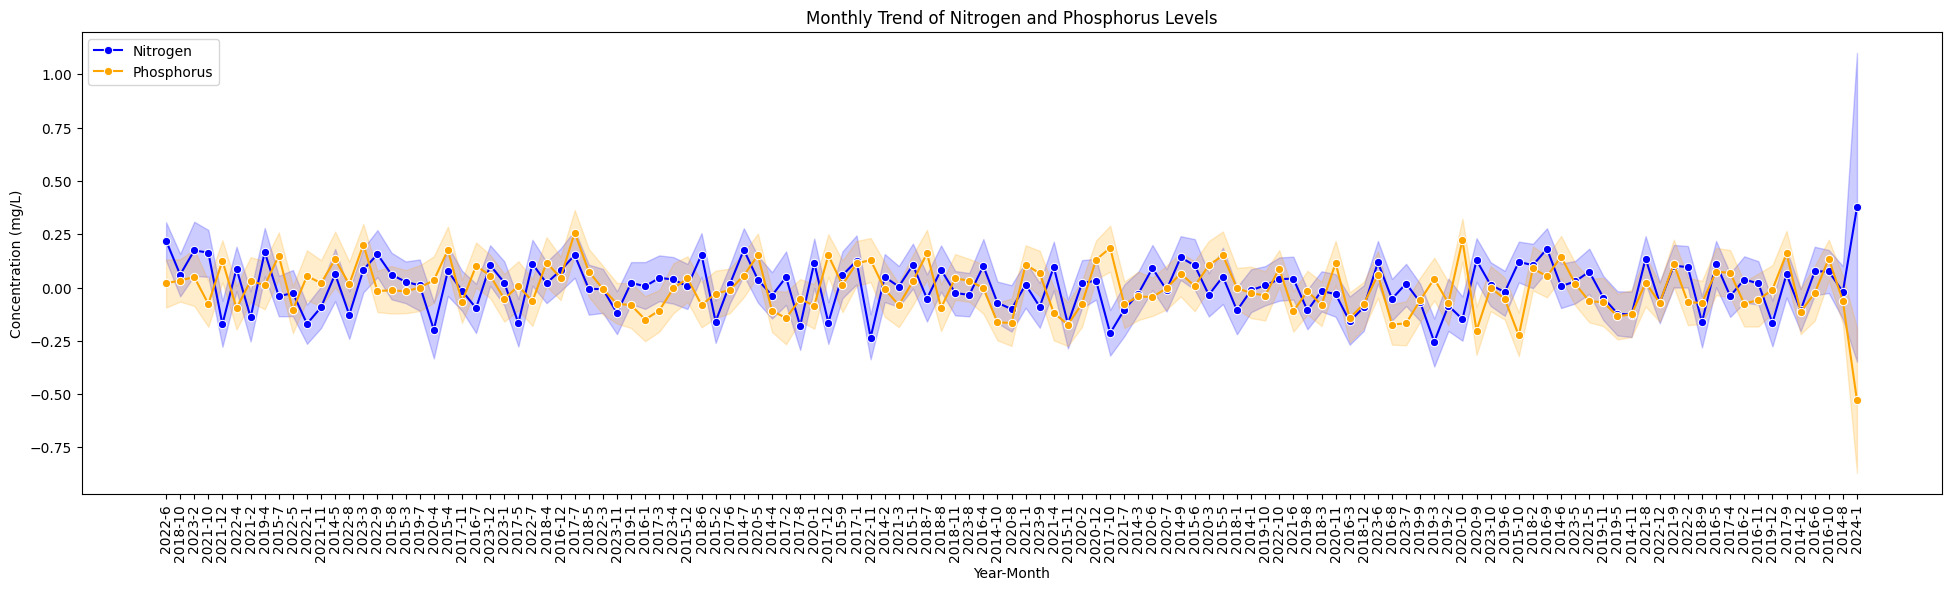

In [47]:
# 4. Nitrogen and Phosphorus levels over time (Year-Month Trend)
plt.figure(figsize=(24, 6))
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

sns.lineplot(x='Year-Month', y='Nitrogen (mg/L)', data=df, marker='o', color='blue', label='Nitrogen')
sns.lineplot(x='Year-Month', y='Phosphorus (mg/L)', data=df, marker='o', color='orange', label='Phosphorus')
plt.xticks(rotation=90)
plt.title('Monthly Trend of Nitrogen and Phosphorus Levels')
plt.xlabel('Year-Month')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()

### <i> Modeling </i>

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split


### <i> Logistic Regression </i>

In [49]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Results:
Accuracy: 0.5028692614770459

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4031
           1       0.00      0.00      0.00      2519
           2       0.00      0.00      0.00      1466

    accuracy                           0.50      8016
   macro avg       0.17      0.33      0.22      8016
weighted avg       0.25      0.50      0.34      8016


Confusion Matrix:
 [[4031    0    0]
 [2519    0    0]
 [1466    0    0]]


### <i> Random Forest </i>

In [50]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Classifier Results:
Accuracy: 0.9960079840319361

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4031
           1       1.00      0.99      1.00      2519
           2       1.00      0.99      1.00      1466

    accuracy                           1.00      8016
   macro avg       1.00      1.00      1.00      8016
weighted avg       1.00      1.00      1.00      8016


Confusion Matrix:
 [[4031    0    0]
 [  24 2495    0]
 [   8    0 1458]]


### <i> XGBosst </i>

In [51]:
# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("\nXGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Classifier Results:
Accuracy: 0.8239770459081837

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86      4031
           1       0.91      0.73      0.81      2519
           2       0.96      0.58      0.72      1466

    accuracy                           0.82      8016
   macro avg       0.88      0.76      0.80      8016
weighted avg       0.85      0.82      0.82      8016


Confusion Matrix:
 [[3924   95   12]
 [ 665 1831   23]
 [ 528   88  850]]
